In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
%matplotlib inline


In [2]:
seq_name = "Campfire"
QP = "QP22"

In [3]:
def frame_processing(filename,currframe = 0):
    f = open("D:/frame/"+filename+"/"+filename+'%d'%currframe+'.txt', "r")
    rowlist = []
    for line in f:
        rowpix = line.split(" ")
        results = [int(i) for i in rowpix[:-1]]
        rowlist.append(results)
    img = np.asarray(rowlist)
    img = img /4
    return img

In [4]:
def frame_padding(frame,CTU_size = 128):
    width , height = frame.shape[1],frame.shape[0]
    #print(width,height)
    width_CTU_nums = math.ceil(width/128)
    height_CTU_nums = math.ceil(height/128)
    pad_frame = np.zeros((height_CTU_nums*128,width_CTU_nums*128))
    for x in range(height):
        for y in range(width):
            pad_frame[x][y] = frame[x][y]
    return pad_frame

In [5]:
img = frame_processing(seq_name,0)
yuv_img_padding = frame_padding(img)

origin frame:


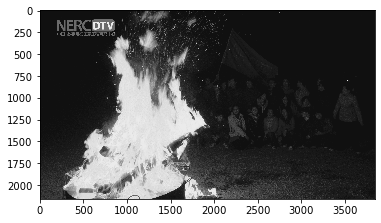

In [6]:
yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')

print("origin frame:")
plt.imshow(yuv_img)

padding frame:


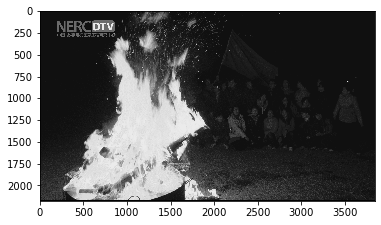

In [7]:
print("padding frame:")
yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
plt.imshow(yuv_img_padding)

In [8]:
def frame_partition(test_seq,unit , img , yuv_img , QP = "QP" , currframe = 0):
    frame_width , frame_height = img.shape[1],img.shape[0]
    CTU_NUM = math.ceil(frame_width/128) * math.ceil(frame_height/128)
    frame_partition = np.zeros((frame_height,frame_width))
    fig,ax = plt.subplots(1)
    ax.imshow(yuv_img)
    begin = currframe * CTU_NUM
    for i in range(begin,CTU_NUM+begin):
        f = open("D:/frame/"+seq_name+"/"+"/"+QP+"/"+unit+'_%d.txt'%(i), "r")
        for line in f:
            row = line.split(" ")
            startx , starty , height , width = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3])
            if startx == 0 and starty==0 and height == 0 and width == 0:
                continue
            rect = patches.Rectangle((startx,starty),width,height,linewidth=1,edgecolor='red',facecolor='none')
            ax.add_patch(rect)
    print(unit+" Partition:")
    plt.show()

CTU Partition:


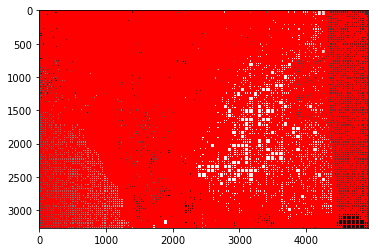

In [77]:
frame_partition(seq_name,"CTU",img,yuv_img,QP,currframe = 0)


#frame_partition(seq_name,"TU",img,yuv_img,QP)

In [9]:

def frame_partition_saveimg(test_seq,unit , img):
    frame_width , frame_height = img.shape[1],img.shape[0]
    img = np.zeros((frame_height,frame_width))
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i in range(7,8):
        f = open("D:/frame/"+seq_name+"/"+QP+"/"+unit+'_%d.txt'%(i), "r")
        for line in f:
            row = line.split(" ")
            startx , starty , height , width = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3])
            if startx == 0 and starty==0 and height == 0 and width == 0:
                continue
            rect = patches.Rectangle((startx,starty),width,height,linewidth=1,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    plt.savefig(unit+'_output.png')


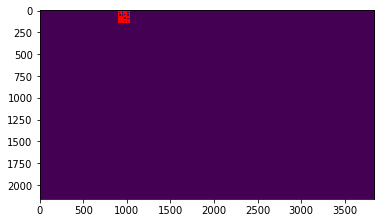

In [97]:
frame_partition_saveimg(seq_name,"CTU",img)

# Eliminate the samples whose RD cost difference between the optimal and sub-optimal partition structure is too small.

In [9]:
def RDeliminate(test_seq , QP = "QP" , ratiod8 = True , beginx=0 , beginy=0 , i = 0):
    qt64_32 = []
    checklist = [False]*16
    costlist = [0]*16
    costlist_32 = [0]*16
    
    costqt64 = [0]*4
    costqt32 = [0]*4
    checklist64_32 = [False]*4
    f = open("D:/frame/"+test_seq+"/CURDCOST/"+QP+"/CTU_%d.txt"%(i), "r")
    for line in f:
        row = line.split(" ")
        startx , starty , height , width,cost = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3]) , float(row[4])
        
        if (height == 64 and width == 64) :

            if (startx - beginx)//64 == 0 and (starty - beginy)//64 == 0:
                costqt64[0] += cost
            elif (startx - beginx)//64 == 1 and (starty - beginy)//64 == 0:
                costqt64[1] += cost
            elif (startx - beginx)//64 == 0 and (starty - beginy)//64 == 1:
                costqt64[2] += cost
            elif (startx - beginx)//64 == 1 and (starty - beginy)//64 == 1:
                costqt64[3] += cost

        if (height == 32 and width ==32):
            
            if (startx - beginx)//64 == 0 and (starty - beginy)//64 == 0:
                costqt32[0] += cost
            elif (startx - beginx)//64 == 1 and (starty - beginy)//64 == 0:
                costqt32[1] += cost
            elif (startx - beginx)//64 == 0 and (starty - beginy)//64 == 1:
                costqt32[2] += cost
            elif (startx - beginx)//64 == 1 and (starty - beginy)//64 == 1:
                costqt32[3] += cost
  

           
            ######################################################################
            if (startx - beginx)//32 == 0 and (starty - beginy)//32 == 0:
                costlist_32[0]+=cost
            elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 0:
                costlist_32[1]+=cost
            elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 0:
                costlist_32[2]+=cost
            elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 0:
                costlist_32[3]+=cost
            elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 1:
                costlist_32[4]+=cost
            elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 1:
                costlist_32[5]+=cost
            elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 1:
                costlist_32[6]+=cost
            elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 1:
                costlist_32[7]+=cost
            elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 2:
                costlist_32[8]+=cost
            elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 2:
                costlist_32[9]+=cost
            elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 2:
                costlist_32[10]+=cost
            elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 2:
                costlist_32[11]+=cost
            elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 3:
                costlist_32[12]+=cost
            elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 3:
                costlist_32[13]+=cost
            elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 3:
                costlist_32[14]+=cost
            elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 3:
                costlist_32[15]+=cost
    f = open("D:/frame/"+test_seq+"/"+QP+"/CTU_%d.txt"%(i), "r")
    for line in f:
        row = line.split(" ")
        startx , starty , height , width = int(row[0]) , int(row[1]) , int(row[2]) , int(row[3]) 
        if startx == 0 and starty==0 and height == 0 and width == 0:
            continue
        cost = float(row[7])
        if (startx - beginx)//32 == 0 and (starty - beginy)//32 == 0:
            costlist[0]+=cost
        elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 0:
            costlist[1]+=cost
        elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 0:
            costlist[2]+=cost
        elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 0:
            costlist[3]+=cost
        elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 1:
            costlist[4]+=cost
        elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 1:
            costlist[5]+=cost
        elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 1:
            costlist[6]+=cost
        elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 1:
            costlist[7]+=cost
        elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 2:
            costlist[8]+=cost
        elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 2:
            costlist[9]+=cost
        elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 2:
            costlist[10]+=cost
        elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 2:
            costlist[11]+=cost
        elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 3:
            costlist[12]+=cost
        elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 3:
            costlist[13]+=cost
        elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 3:
            costlist[14]+=cost
        elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 3:
            costlist[15]+=cost

    #print(costqt32)
    #print(costqt64)
    #print(costlist)
    #print(costlist_32)
    for i in range(4):
        if (costqt32[i] + costqt64[i]) == 0:
            continue
        deltaRD = abs((costqt32[i] - costqt64[i]) / (costqt32[i] + costqt64[i]))
        #print(deltaRD)
        if deltaRD <= 0.01 :
            #print("deltaRD%f"%(deltaRD))
            #print("delete")
            checklist64_32[i] = True
    for i in range(16):
        if (costlist[i] + costlist_32[i]) == 0 or (costlist[i] == costlist_32[i]) :
            continue
        deltaRD = abs((costlist[i] - costlist_32[i]) / (costlist[i] + costlist_32[i]))
        if deltaRD <= 0.01 :
            #print("deltaRD%f"%(deltaRD))
            #print("delete")
            checklist[i] = True
    return checklist , checklist64_32

## Generate 32X32 CU depth label

In [19]:
def depth_label(test_seq,yuv_img_padding,yuv_img,CTU_index=0,cnt=0,frame_num = 0,QP = "QP",train=True,eliminate = True):
    
    org_width,org_height = yuv_img.size
    #print(org_width,org_height )
    width , height = yuv_img_padding.size
    frame_padding = yuv_img_padding.convert('RGB')
    for beginy in range(0, height, 128):
        for beginx in range(0, width, 128):
            #if train == True:
            #    f = open("D:/frame/ratiod8/"+test_seq+"/"+QP+"/CTU_%d.txt"%CTU_index, "r")
            #else:
            f = open("D:/frame/"+test_seq+"/"+QP+"/CTU_%d.txt"%CTU_index, "r")
            #print(beginy,beginx)
            #print(CTU_index)
            label_dict = [0]*16
            TT_dict = [0]*16
            for line in f:   
                row = line.split(" ")
                startx,starty,depth,btdepth,mtdepth = int(row[0]),int(row[1]),int(row[4]), int(row[5]),int(row[6])
                cuheight , cuwidth = int(row[2]) , int(row[3])
                if startx == 0 and starty==0 and cuheight == 0 and cuwidth == 0:
                    continue
                if (startx - beginx)//32 == 0 and (starty - beginy)//32 == 0:
                    #print(2*depth+btdepth)
                    label_dict[0] = max(label_dict[0],2*depth+btdepth)
                    TT_dict[0] = max(TT_dict[0],btdepth-mtdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 0:
                    label_dict[1] = max(label_dict[1],2*depth+btdepth)
                    TT_dict[1] = max(TT_dict[1],btdepth-mtdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 0:
                    label_dict[2] = max(label_dict[2],2*depth+btdepth)
                    TT_dict[2] = max(TT_dict[2],btdepth-mtdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 0:
                    label_dict[3] = max(label_dict[3],2*depth+btdepth)
                    TT_dict[3] = max(TT_dict[3],btdepth-mtdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 1:
                    label_dict[4] = max(label_dict[4],2*depth+btdepth)
                    TT_dict[4] = max(TT_dict[4],btdepth-mtdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 1:
                    label_dict[5] = max(label_dict[5],2*depth+btdepth)
                    TT_dict[5] = max(TT_dict[5],btdepth-mtdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 1:
                    label_dict[6] = max(label_dict[6],2*depth+btdepth)
                    TT_dict[6] = max(TT_dict[6],btdepth-mtdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 1:
                    label_dict[7] = max(label_dict[7],2*depth+btdepth)
                    TT_dict[7] = max(TT_dict[7],btdepth-mtdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 2:
                    label_dict[8] = max(label_dict[8],2*depth+btdepth)
                    TT_dict[8] = max(TT_dict[8],btdepth-mtdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 2:
                    label_dict[9] = max(label_dict[9],2*depth+btdepth)
                    TT_dict[9] = max(TT_dict[9],btdepth-mtdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 2:
                    label_dict[10] = max(label_dict[10],2*depth+btdepth)
                    TT_dict[10] = max(TT_dict[10],btdepth-mtdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 2:
                    label_dict[11] = max(label_dict[11],2*depth+btdepth)
                    TT_dict[11] = max(TT_dict[11],btdepth-mtdepth)
                elif (startx - beginx)//32 == 0 and (starty - beginy)//32 == 3:
                    label_dict[12] = max(label_dict[12],2*depth+btdepth)
                    TT_dict[12] = max(TT_dict[12],btdepth-mtdepth)
                elif (startx - beginx)//32 == 1 and (starty - beginy)//32 == 3:
                    label_dict[13] = max(label_dict[13],2*depth+btdepth)
                    TT_dict[13] = max(TT_dict[13],btdepth-mtdepth)
                elif (startx - beginx)//32 == 2 and (starty - beginy)//32 == 3:
                    label_dict[14] = max(label_dict[14],2*depth+btdepth)
                    TT_dict[14] = max(TT_dict[14],btdepth-mtdepth)
                elif (startx - beginx)//32 == 3 and (starty - beginy)//32 == 3:
                    label_dict[15] = max(label_dict[15],2*depth+btdepth)
                    TT_dict[15] = max(TT_dict[15],btdepth-mtdepth)
            #print(label_dict)
            if train == True and eliminate == True:
                check32,check64 = RDeliminate(test_seq,QP,ratiod8 = True,beginx=beginx , beginy=beginy , i = CTU_index)
            
                if label_dict[0] == 2 and check64[0] == False:
                    label_dict[1] = 2
                    label_dict[4] = 2
                    label_dict[5] = 2
                elif label_dict[0] == 2 and check64[0] == True:
                    label_dict[1] = 0
                    label_dict[4] = 0
                    label_dict[5] = 0
                if label_dict[2] == 2 and check64[1] == False:
                    label_dict[3] = 2 
                    label_dict[6] = 2
                    label_dict[7] =  2
                elif label_dict[2] == 2 and check64[1] == True:
                    label_dict[3] = 0 
                    label_dict[6] = 0
                    label_dict[7] =  0
                if label_dict[8] == 2 and check64[2] == False:
                    label_dict[9] = 2 
                    label_dict[12] = 2 
                    label_dict[13] = 2
                elif label_dict[8] == 2 and check64[2] == True:
                    label_dict[9] = 0 
                    label_dict[12] = 0 
                    label_dict[13] = 0
                if label_dict[10] == 2 and check64[3] == False:
                    label_dict[11] = 2 
                    label_dict[14] = 2 
                    label_dict[15] = 2
                elif label_dict[10] == 2 and check64[3] == True:
                    label_dict[11] = 0 
                    label_dict[14] = 0 
                    label_dict[15] = 0
            else :
                if label_dict[0] == 2 :
                    label_dict[1] = 2
                    label_dict[4] = 2
                    label_dict[5] = 2
                    TT_dict[1] = 0
                    TT_dict[4] = 0
                    TT_dict[5] = 0
                
                if label_dict[2] == 2 :
                    label_dict[3] = 2 
                    label_dict[6] = 2
                    label_dict[7] =  2
                    TT_dict[3] = 0
                    TT_dict[6] = 0
                    TT_dict[7] = 0
               
                if label_dict[8] == 2 :
                    label_dict[9] = 2 
                    label_dict[12] = 2 
                    label_dict[13] = 2
                    TT_dict[9] = 0
                    TT_dict[12] = 0
                    TT_dict[13] = 0
               
                if label_dict[10] == 2 :
                    label_dict[11] = 2 
                    label_dict[14] = 2 
                    label_dict[15] = 2
                    TT_dict[11] = 0
                    TT_dict[14] = 0
                    TT_dict[15] = 0
            #print(label_dict)
            index = 0
            if frame_num > 0:
                for row_i in range(beginy, beginy+128, 32):
                    for col_i in range(beginx, beginx+128, 32):
                        if col_i > org_width or col_i + 32 > org_width or row_i > org_height or row_i + 32 > org_height:
                            index +=1
                            continue
                        crop = frame_padding.crop((col_i, row_i, col_i + 32, row_i + 32))
                        if train == False: 
    #                         if label_dict[index] == 4 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth4"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 5  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 6  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 7  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth7"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 8  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth8_9"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 9  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth8_9"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 10  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_val/depth10"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            if TT_dict[index] > 0 :
                                crop.save("D:/VCCResearch/"+QP+"/TT_CU/valid_TT/have_tt"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            else:
                                crop.save("D:/VCCResearch/"+QP+"/TT_CU/valid_TT/no_tt"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                        elif  train == True and eliminate == True:

                                #if label_dict[index] == 4  and check32[index] == False:
                                #   crop.save("D:/VCCResearch/"+QP+"_5class/train_depthall/depth4"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            if label_dict[index] == 5 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            elif label_dict[index] == 6 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            elif label_dict[index] == 7 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth7_8"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            elif label_dict[index] == 8 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth7_8"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            elif label_dict[index] == 9 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth9_10"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            elif label_dict[index] == 10 and check32[index] == False:
                                crop.save("D:/VCCResearch/"+QP+"/train_depthall/depth9_10"+"/CU_"+test_seq+str(cnt)+".png","PNG")

                        elif  train == True and eliminate == False:
                            if TT_dict[index] > 0 :
                                crop.save("D:/VCCResearch/"+QP+"/TT_CU/train_TT/have_tt"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                            else:
                                crop.save("D:/VCCResearch/"+QP+"/TT_CU/train_TT/no_tt"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         if label_dict[index] == 4  :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth4"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 5 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 6 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth5_6"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 7 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth7"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 8 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth8_9"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 9 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth8_9"+"/CU_"+test_seq+str(cnt)+".png","PNG")
    #                         elif label_dict[index] == 10 :
    #                             crop.save("D:/VCCResearch/"+QP+"/reimplement_train/depth10"+"/CU_"+test_seq+str(cnt)+".png","PNG")
                        cnt+=1
                        index +=1
            
            CTU_index+=1
            #print(CTU_index)
    return CTU_index,cnt

In [20]:
#CTU_index,cnt = 0,0
#QP = "QP22"
QPList = ["QP22","QP27","QP32","QP37"]
#QPList = ["QP22"]
#seq_list = ["BasketballPass"]
seq_list = ["Tango2","FoodMarket4","Campfire","CatRobot1","DaylightRoad2","ParkRunning3","MarketPlace","RitualDance",
            "Cactus","BasketballDrive","BQTerrace","RaceHorsesC","BQMall","PartyScene","BasketballDrill","RaceHorses",
            "BQSquare","BlowingBubbles","BasketballPass","FourPeople","Johnny","KristenAndSara"
            ]
#seq_list = {"intra_train_1":60,"intra_train_2":40,"intra_train_3":10,"intra_train_4":10}
for QP in QPList:
    for seq_name in seq_list:
        CTU_index,cnt = 0,0
        print(seq_name)
        for i in range(3):
            img = frame_processing(seq_name,currframe = i)
            yuv_img = Image.fromarray(img.astype('uint8')).convert('YCbCr')
            yuv_img_padding = frame_padding(img)

            yuv_img_padding = Image.fromarray(yuv_img_padding.astype('uint8')).convert('YCbCr')
            CTU_index,cnt = depth_label(seq_name,yuv_img_padding,yuv_img, CTU_index , cnt , i ,QP,False,False)
            print(i,CTU_index,cnt)
        print("Finish") 




Tango2
0 510 0
1 1020 8040
2 1530 16080
Finish
FoodMarket4
0 510 0
1 1020 8040
2 1530 16080
Finish
Campfire
0 510 0
1 1020 8040
2 1530 16080
Finish
CatRobot1
0 510 0
1 1020 8040
2 1530 16080
Finish
DaylightRoad2
0 510 0
1 1020 8040
2 1530 16080
Finish
ParkRunning3
0 510 0
1 1020 8040
2 1530 16080
Finish
MarketPlace
0 135 0
1 270 1980
2 405 3960
Finish
RitualDance
0 135 0
1 270 1980
2 405 3960
Finish
Cactus
0 135 0
1 270 1980
2 405 3960
Finish
BasketballDrive
0 135 0
1 270 1980
2 405 3960
Finish
BQTerrace
0 135 0
1 270 1980
2 405 3960
Finish
RaceHorsesC
0 28 0
1 56 390
2 84 780
Finish
BQMall
0 28 0
1 56 390
2 84 780
Finish
PartyScene
0 28 0
1 56 390
2 84 780
Finish
BasketballDrill
0 28 0
1 56 390
2 84 780
Finish
RaceHorses
0 8 0
1 16 91
2 24 182
Finish
BQSquare
0 8 0
1 16 91
2 24 182
Finish
BlowingBubbles
0 8 0
1 16 91
2 24 182
Finish
BasketballPass
0 8 0
1 16 91
2 24 182
Finish
FourPeople
0 60 0
1 120 880
2 180 1760
Finish
Johnny
0 60 0
1 120 880
2 180 1760
Finish
KristenAndSara
0 60 0